In [1]:
import sys
sys.path.insert(0,'/home/richard.brito/pSEOBNRv4HM/opt/lib64/python2.7/site-packages/')

In [2]:
%matplotlib inline
import lalsimulation,lal
import matplotlib.pyplot as plt
import numpy as np

H1=lalsimulation.DetectorPrefixToLALDetector('H1')

In [3]:
datapSEO=np.genfromtxt('prodpSEOB_220.dat', names=True)
dataGRSEOB=np.genfromtxt('prodSEOB_GR.dat', names=True)

In [4]:
flow=11.
ampO=0.
f_start22   = flow * 2./(ampO+2) #Frequency at which the signal starts
deltaT      = 1./(1024.)
seglen = 8

def gen_wave(samples,nGR):
    # Define binary parameters
    phi_c       = samples['phase']
    inclination = samples['theta_jn']
    
    m1          = samples['m1']*lal.MSUN_SI
    m2          = samples['m2']*lal.MSUN_SI

    spin1_z     = samples['a1z']
    spin2_z     = samples['a2z']

    distance    = samples['dist']*lal.PC_SI
    
    ra = samples['ra']
    dec = samples['dec']
    psi = samples['psi']
    time=samples['time']
    
    if(nGR == 1):
        domega220=samples['domega220']
        dtau220=samples['dtau220']
        TGRparams_dict = lal.CreateDict()
        lalsimulation.SimInspiralWaveformParamsInsertDOmega220(TGRparams_dict, domega220)
        lalsimulation.SimInspiralWaveformParamsInsertDTau220(TGRparams_dict,  dtau220)
    else: 
        TGRparams_dict = lal.CreateDict()
        
    # Generate the waveform
    hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,
                                                    0., 0., spin1_z, #Aligned-spin wf
                                                    0., 0., spin2_z, #Aligned-spin wf
                                                    distance,
                                                    inclination,
                                                    phi_c,
                                                    0., 0., 0., #longAscNodes, eccentricity, meanPerAno
                                                    deltaT,
                                                    f_start22, #flow
                                                    11., #fref
                                                    TGRparams_dict,
                                                    lalsimulation.SEOBNRv4HM)

    
    #h = hp.data.data
    #time_array = np.arange(hp.data.length, dtype=float) * hp.deltaT + hp.epoch.gpsSeconds+1e-9*hp.epoch.gpsNanoSeconds

    
    hH1=lalsimulation.SimDetectorStrainREAL8TimeSeries(hp, hc,ra, dec, psi, H1)    
    h = hH1.data.data
    H1_delay=lal.TimeDelayFromEarthCenter(H1.location, ra, dec, lal.LIGOTimeGPS(time))
    time_array = np.arange(hH1.data.length, dtype=float) * hH1.deltaT + time +H1_delay + hH1.epoch.gpsSeconds+1e-9*hH1.epoch.gpsNanoSeconds

    return time_array, h

In [5]:
# MaxL for pSEOB
phi_c     = 2.829717887732367
inclination = 0.5259096447026425
m1          = 122.67592384379418*lal.MSUN_SI
m2          = 99.49532903711783*lal.MSUN_SI
spin1_z     = -0.6062124500844083
spin2_z     = -0.6771135620480033
distance    = 4039.183443266625*lal.PC_SI
ra = 0.2239388899977115
dec = -1.1532681951323225
psi = 2.046276387615645
time= 1242442967.416759
domega220= -0.051982674557868154
dtau220= 0.8548248509636287

TGRparams_dict = lal.CreateDict()
lalsimulation.SimInspiralWaveformParamsInsertDOmega220(TGRparams_dict, domega220)
lalsimulation.SimInspiralWaveformParamsInsertDTau220(TGRparams_dict,  dtau220)
        
# Generate the waveform
hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,
                                                    0., 0., spin1_z, #Aligned-spin wf
                                                    0., 0., spin2_z, #Aligned-spin wf
                                                    distance,
                                                    inclination,
                                                    phi_c,
                                                    0., 0., 0., #longAscNodes, eccentricity, meanPerAno
                                                    deltaT,
                                                    f_start22, #flow
                                                    11., #fref
                                                    TGRparams_dict,
                                                    lalsimulation.SEOBNRv4HM)
 
    
#hpSEOBmaP = hp.data.data
#time_arraypSEOBmaP = np.arange(hp.data.length, dtype=float) * hp.deltaT + hp.epoch.gpsSeconds+1e-9*hp.epoch.gpsNanoSeconds

hH1=lalsimulation.SimDetectorStrainREAL8TimeSeries(hp, hc,ra, dec, psi, H1)    
hpSEOBmaP = hH1.data.data
H1_delay=lal.TimeDelayFromEarthCenter(H1.location, ra, dec, lal.LIGOTimeGPS(time))
time_arraypSEOBmaP = np.arange(hH1.data.length, dtype=float) * hH1.deltaT + time + H1_delay + hH1.epoch.gpsSeconds+1e-9*hH1.epoch.gpsNanoSeconds


In [6]:
# MaxP for SEOB
phi_c     = 0.47736277961553875
inclination = 0.1283033701935272
m1          = 170.94697409285476*lal.MSUN_SI
m2          = 101.98984135457926*lal.MSUN_SI
spin1_z     = 0.4449133967661545
spin2_z     = -0.6190554360503144
distance    = 4664.57939823353*lal.PC_SI
ra = 0.10292153859439424
dec = -1.1467838850996181
psi = 3.0387250706994164
time= 1242442967.4150577

TGRparams_dict = lal.CreateDict()
        
# Generate the waveform
hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,
                                                    0., 0., spin1_z, #Aligned-spin wf
                                                    0., 0., spin2_z, #Aligned-spin wf
                                                    distance,
                                                    inclination,
                                                    phi_c,
                                                    0., 0., 0., #longAscNodes, eccentricity, meanPerAno
                                                    deltaT,
                                                    f_start22, #flow
                                                    11., #fref
                                                    TGRparams_dict,
                                                    lalsimulation.SEOBNRv4HM)
 
    
#hSEOBmaP = hp.data.data
#time_arraySEOBmaP = np.arange(hp.data.length, dtype=float) * hp.deltaT + hp.epoch.gpsSeconds+1e-9*hp.epoch.gpsNanoSeconds

hH1=lalsimulation.SimDetectorStrainREAL8TimeSeries(hp, hc,ra, dec, psi, H1)    
hSEOBmaP = hH1.data.data
H1_delay=lal.TimeDelayFromEarthCenter(H1.location, ra, dec, lal.LIGOTimeGPS(time))
time_arraySEOBmaP = np.arange(hH1.data.length, dtype=float) * hp.deltaT + time + H1_delay + hH1.epoch.gpsSeconds+1e-9*hH1.epoch.gpsNanoSeconds



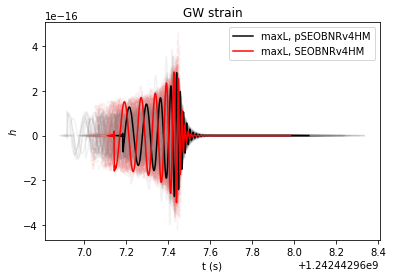

In [18]:
for i in range(0,100):
    
    timenGR, hnGR = gen_wave(datapSEO[i],1)
    timeGR, hGR = gen_wave(dataGRSEOB[i],0)

    plt.plot(timenGR, hnGR, color='grey', linestyle='-',alpha=.1)
    plt.plot(timeGR,  hGR, color='lightcoral', linestyle='--',alpha=.1)
    plt.ylabel('$h$')
    plt.xlabel('t (s)')
    plt.title('GW strain')

plt.plot(time_arraypSEOBmaP,hpSEOBmaP, color='black', linestyle='-',alpha=5,label='maxL, pSEOBNRv4HM')   
plt.plot(time_arraySEOBmaP,hSEOBmaP, color='red', linestyle='-',alpha=5,label='maxL, SEOBNRv4HM')   


plt.legend()
plt.show()

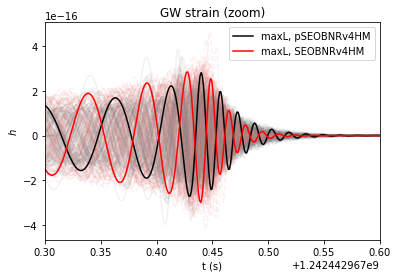

In [19]:
for i in range(0,100):
    
    timenGR, hnGR = gen_wave(datapSEO[i],1)
    timeGR, hGR = gen_wave(dataGRSEOB[i],0)

    plt.plot(timenGR, hnGR, color='grey', linestyle='-',alpha=.1)
    plt.plot(timeGR,  hGR, color='lightcoral', linestyle='--',alpha=.1)
    plt.ylabel('$h$')
    plt.xlabel('t (s)')
    plt.title('GW strain (zoom)')

plt.plot(time_arraypSEOBmaP,hpSEOBmaP, color='black', linestyle='-',alpha=5,label='maxL, pSEOBNRv4HM')   
plt.plot(time_arraySEOBmaP,hSEOBmaP, color='red', linestyle='-',alpha=5,label='maxL, SEOBNRv4HM')   


plt.xlim([1242442967.3,1242442967.6])
plt.legend()
plt.show()

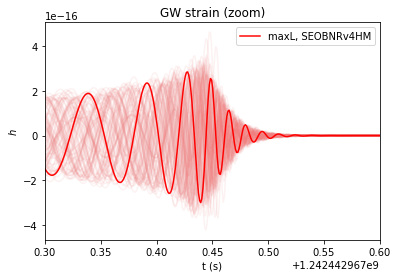

In [10]:
for i in range(0,100):
    
    timeGR, hGR = gen_wave(dataGRSEOB[i],0)
    plt.plot(timeGR,  hGR, color='lightcoral', linestyle='-',alpha=0.1)
    plt.ylabel('$h$')
    plt.xlabel('t (s)')
    plt.title('GW strain (zoom)')

plt.plot(time_arraySEOBmaP,hSEOBmaP, color='red', linestyle='-',alpha=5,label='maxL, SEOBNRv4HM')   


plt.xlim([1242442967.3,1242442967.6])
plt.legend()
plt.show()

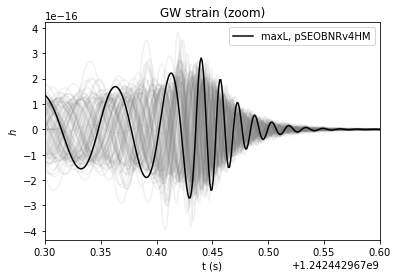

In [11]:
for i in range(0,100):
    
    timenGR, hnGR = gen_wave(datapSEO[i],1)
    plt.plot(timenGR, hnGR, color='grey', linestyle='-',alpha=.1)
    plt.ylabel('$h$')
    plt.xlabel('t (s)')
    plt.title('GW strain (zoom)')

plt.plot(time_arraypSEOBmaP,hpSEOBmaP, color='black', linestyle='-',alpha=5,label='maxL, pSEOBNRv4HM')   


plt.xlim([1242442967.3,1242442967.6])
plt.legend()
plt.show()